In [325]:
import numpy as np
import cond_color
import matplotlib.pyplot as plt
import random

In [326]:
data = np.load('psths.npz')
X, times = data['X'], data['times']

print(np.shape(X), np.shape(times))
N=X.shape[0]
C=X.shape[1]
T=X.shape[2]

(182, 108, 130) (130,)


__1a__

In [327]:
neurons = sorted(random.sample(range(0,N-1),5))
conditions = sorted(random.sample(range(0,N-1),5))

print(neurons)
print(conditions)

neurons = [36, 43, 126, 148, 149]
conditions  = [18, 35, 62, 74, 86]

[61, 68, 74, 103, 177]
[75, 95, 109, 120, 135]


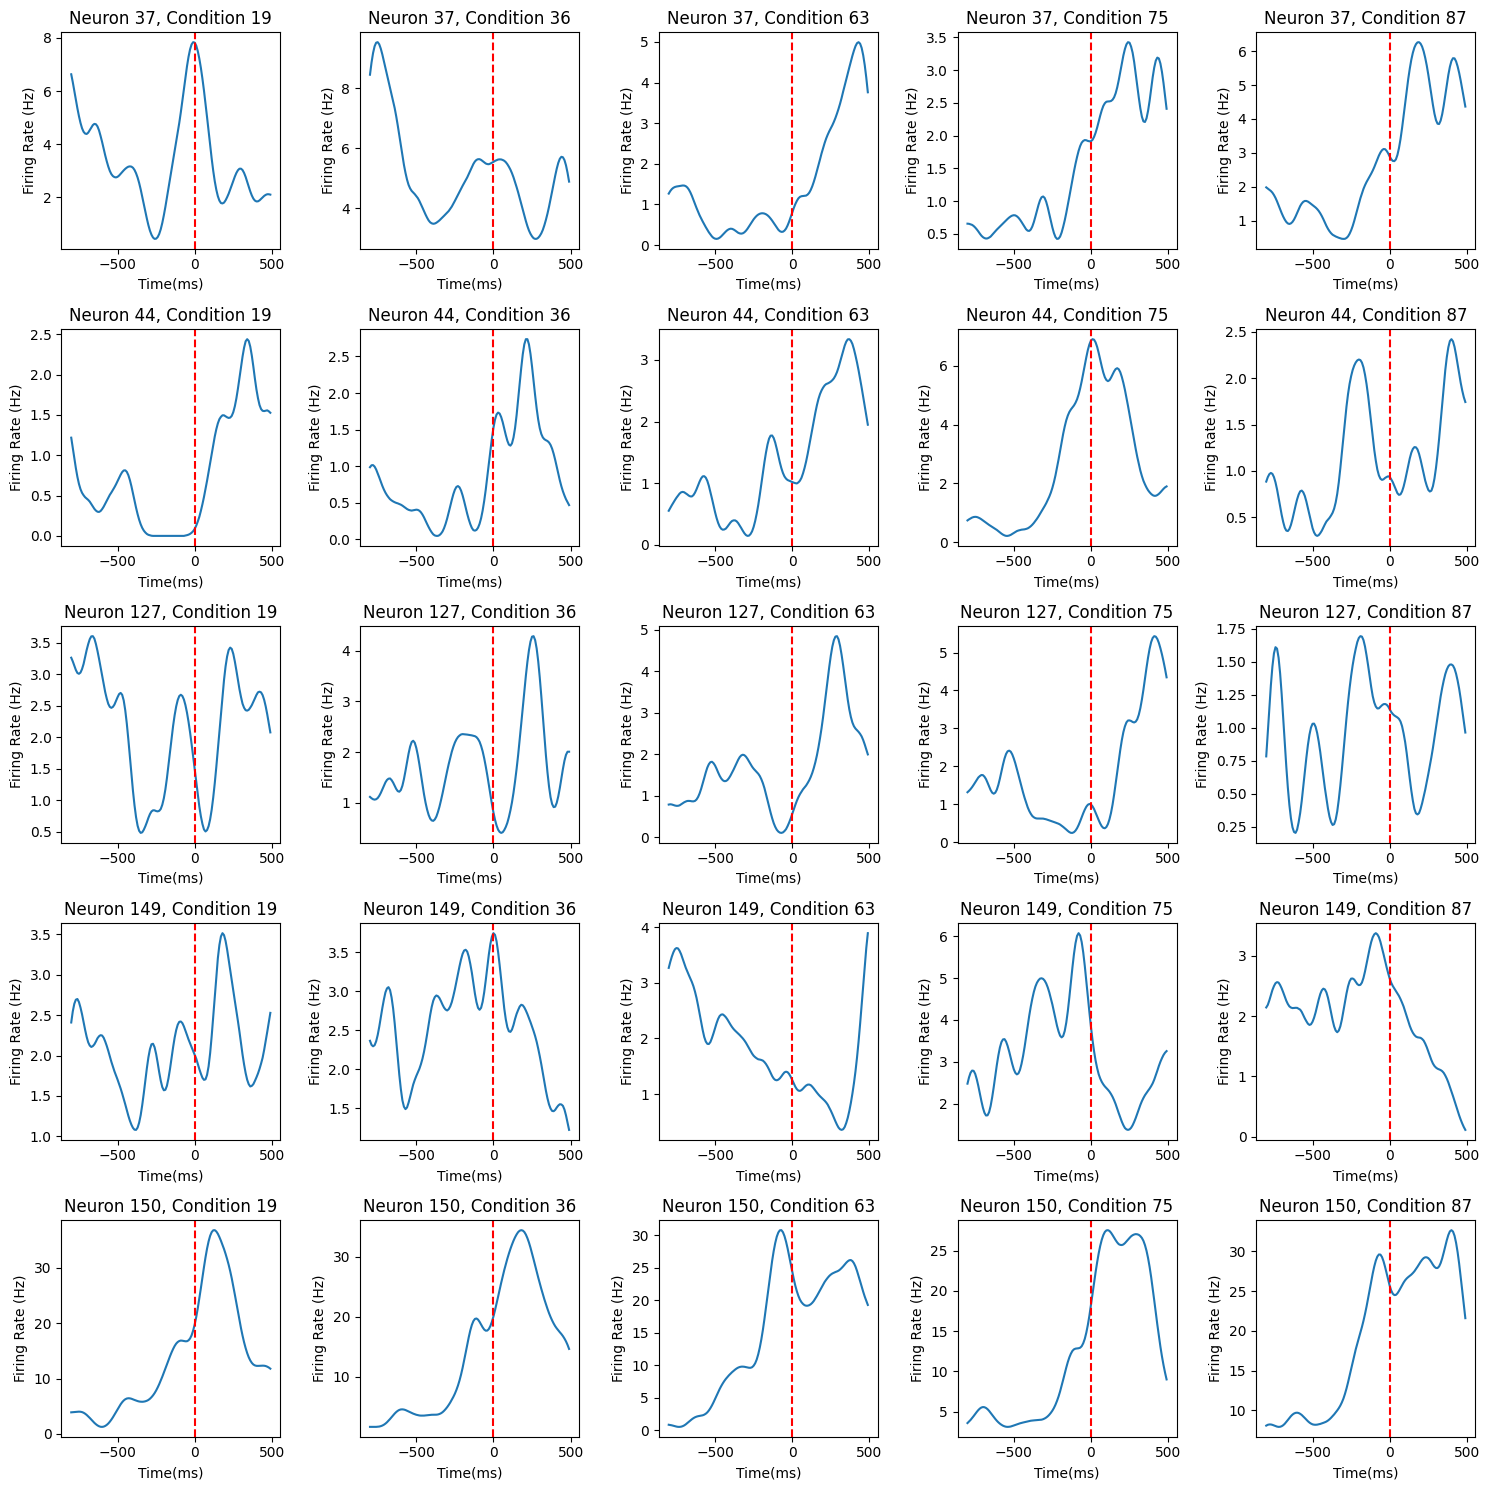

In [328]:
avg_firing_rate = X.mean(axis=(0,1))
plt.figure(figsize=((15,15)))
for i, neuron in enumerate(neurons):
    for j, condition in enumerate(conditions):
        plt.subplot(len(neurons), len(conditions), i * len(conditions) + j + 1)
        plt.plot(times,X[neuron, condition, :], label=f'Neuron {neuron+1}, Cond {condition+1}')
        plt.axvline(0,color = 'red', linestyle = '--', label = 'Movement Offset')
        plt.xlabel('Time(ms)')
        plt.ylabel('Firing Rate (Hz)')
        plt.title(f'Neuron {neuron +1}, Condition {condition + 1}')
        plt.tight_layout()
plt.tight_layout()
plt.show()

__1b__

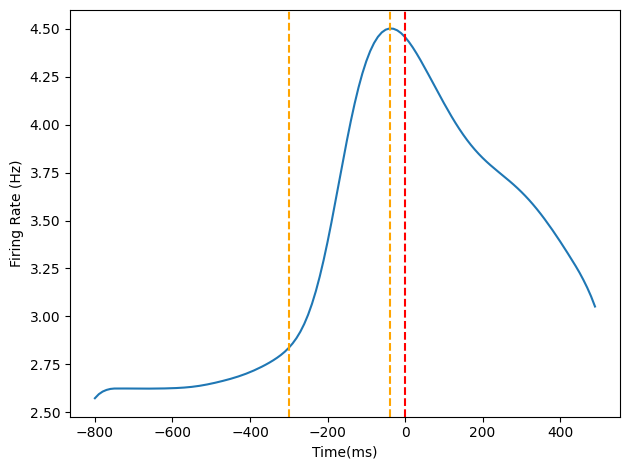

In [329]:
plt.plot(times, avg_firing_rate)
standard_deviation_avg_firing_rate = np.std(avg_firing_rate)
peak_time = times[np.where(avg_firing_rate == max(avg_firing_rate))]
rise_time = -300

plt.axvline(0,color = 'red', linestyle = '--', label = 'Movement Offset')
plt.axvline(rise_time,color = 'orange', linestyle = '--', label = 'Movement Offset')
plt.axvline(peak_time ,color = 'orange', linestyle = '--', label = 'Movement Offset')
plt.xlabel('Time(ms)')
plt.ylabel('Firing Rate (Hz)')
plt.tight_layout()
plt.show()

__2a__

(182,)


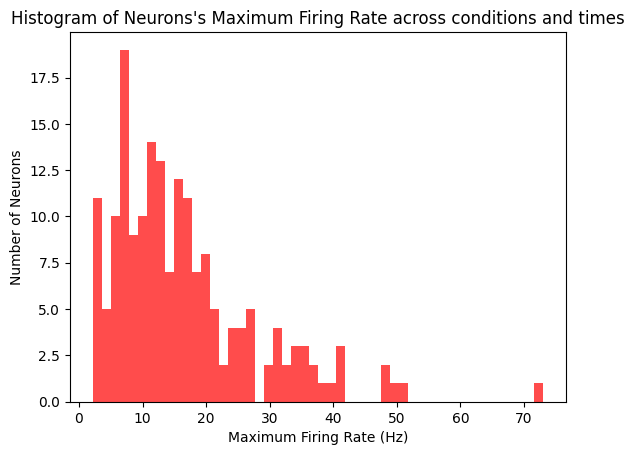

In [330]:
max_neurons = X.max(axis=(1,2))
print(np.shape(max_neurons))
plt.hist(max_neurons, bins=50, color = 'red', alpha = 0.7)
plt.ylabel("Number of Neurons")
plt.xlabel("Maximum Firing Rate (Hz)")
plt.title("Histogram of Neurons's Maximum Firing Rate across conditions and times")
plt.show()

In [331]:
#Normalised PSTH

a = X.max(axis = (1,2))
b = X.min(axis = (1,2))

a = a[:,np.newaxis,np.newaxis]
b = b[:,np.newaxis,np.newaxis]

X = (X-b)/(a-b+5)


__2b__

In [332]:
ccm = X.mean(axis = 1)
ccm = ccm[:,np.newaxis,:]

X = X - ccm

__2c__

In [333]:
start = np.searchsorted(times, -150)
end = np.searchsorted(times, 300)

X_Cut = X[:,:,start:end+1] #end by itself to not include but chose end+1 to have 46 as handout says
T = X_Cut.shape[2]
X_Cut.shape

(182, 108, 46)

In [334]:
H = np.array([[[1, 2, 3, 4], [5, 6, 7, 8], [9, 10, 11, 12]],
              [[13, 14, 15, 16], [17, 18, 19, 20], [21, 22, 23, 24]]])
H_new = H.reshape(2,12)
H_new

array([[ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
       [13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])

In [335]:
X_new = X_Cut.reshape(N,C*T)
X_new.shape


(182, 4968)

In [336]:
V,S,Ut = np.linalg.svd(X_new)

In [337]:
M = 12

V_M =(1/T) * V[:,:M]
print(V_M.shape)
print(X_new.shape)
Z = V_M.T @ X_new
Z.shape

(182, 12)
(182, 4968)


(12, 4968)

__3__

In [338]:
Z[1,:]
Z_3D = Z.reshape(M,C,T)
Z_3D.shape


(12, 108, 46)

In [339]:
#PC1-PC2 Plane
PC1 = Z_3D[0,:,:]
PC2 = Z_3D[1,:,:]
PC = Z_3D[:2,:,:]
print(PC1.shape)
PC.shape

(108, 46)


(2, 108, 46)

In [340]:
def plot_nuero(C,alt=False,end = -1, alph =1): #C shape = (M, C, T)
    cols = cond_color.get_colors(C[0,:,0],C[1,:,0], alt_colors=alt)
    for c in range(C.shape[1]):
        plt.plot(C[0,c,0:end],C[1,c,0:end], color = cols[c], alpha = alph)

        cond_color.plot_start(C[0,c,0], C[1,c,0], colors=cols[c], markersize = 50)
        cond_color.plot_end(C[0,c,end], C[1,c,end], colors=cols[c], markersize = 5)
    plt.xlabel("Real")
    plt.ylabel("Imag")

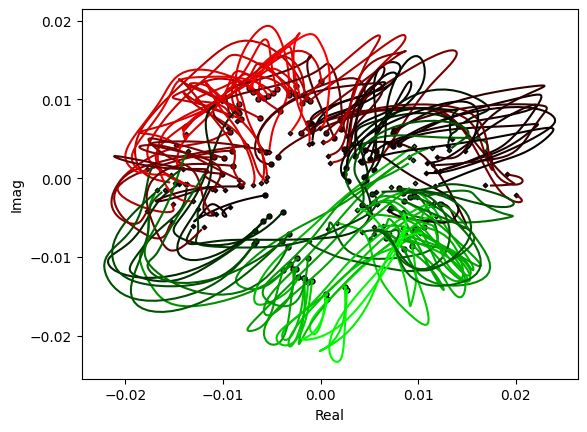

In [341]:
plot_nuero(PC)
plt.show()

In [342]:


# cols = cond_color.get_colors(PC1[:,0],PC2[:,0])

# for c in range(C):
#     plt.plot(PC1[c],PC2[c], color = cols[c])

#     cond_color.plot_start(PC1[c,0], PC2[c,0], colors=cols[c], markersize = 50)
#     cond_color.plot_end(PC1[c,-1], PC2[c,-1], colors=cols[c], markersize = 5)
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.show()

__4a__

In [343]:
D_Z = np.diff(Z_3D,axis=2)
Z_Past = Z_3D[:,:,:-1]
print(Z_Past.shape)
D_Z.shape

(12, 108, 45)


(12, 108, 45)

In [344]:
Z_Past_2D = np.reshape(Z_Past,(M,C*(T-1)))
Z_Past_2D.shape

(12, 4860)

In [345]:
D_Z_2D = np.reshape(D_Z,(M,C*(T-1)))
D_Z_2D.shape

(12, 4860)

__4B__

In [346]:
def H_Make(M):
    K = (M*(M-1))//2
    H=np.zeros((K,M,M))

    k=0
    for i in range(M):
        for j in range(i+1,M):
            H[k,i,j] = 1
            H[k,j,i] = -1
            k+=1
    return H,K

def A_Make (beta,H):
    return np.tensordot(beta,H,axes=1)

In [347]:
H_Test,K_Test = H_Make(4)
print(H_Test)

[[[ 0.  1.  0.  0.]
  [-1.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  1.  0.]
  [ 0.  0.  0.  0.]
  [-1.  0.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  1.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [-1.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  1.  0.]
  [ 0. -1.  0.  0.]
  [ 0.  0.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  1.]
  [ 0.  0.  0.  0.]
  [ 0. -1.  0.  0.]]

 [[ 0.  0.  0.  0.]
  [ 0.  0.  0.  0.]
  [ 0.  0.  0.  1.]
  [ 0.  0. -1.  0.]]]


In [348]:
beta_Test = np.arange(1,K_Test+1)
print(beta_Test)
A_Make(beta_Test,H_Test)

[1 2 3 4 5 6]


array([[ 0.,  1.,  2.,  3.],
       [-1.,  0.,  4.,  5.],
       [-2., -4.,  0.,  6.],
       [-3., -5., -6.,  0.]])

__4c__

In [349]:
H,K = H_Make(M)


In [350]:
W = np.einsum('aik,kj -> aij', H,Z_Past_2D )
W.shape

(66, 12, 4860)

In [351]:
b = np.einsum('bij,ij->b',W,D_Z_2D)
b.shape

(66,)

In [352]:
Q = np.einsum('aij,bij -> ab', W,W)
Q.shape

(66, 66)

In [353]:
#beta = bQ^-1 row vector beta and b
#beta = Q^-1b column vector beta and b, b is already a column so this 

beta = np.linalg.solve(Q,b)
beta.shape

(66,)

In [354]:
A = np.einsum('a,aij->ij',beta,H)
assert np.allclose(A, -A.T), "A is not antisymmetric!"
A.shape

(12, 12)

In [355]:
A+A.T

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

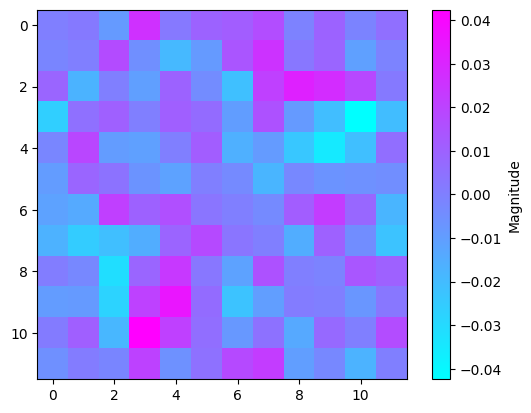

In [356]:
plt.imshow(A,cmap='cool')
plt.colorbar(label="Magnitude")

In [357]:
data = np.load('test.npz')
Z_test, A_test = data['Z_test'], data['A_test']

In [358]:
def A_from_Z (Z):
    Z_P  = Z[:,:,:-1]
    D_Z = np.diff(Z,axis=2)
    Z_P = np.reshape(Z_P, (Z_P.shape[0],Z_P.shape[1]*Z_P.shape[2]))
    D_Z = np.reshape(D_Z, (D_Z.shape[0],D_Z.shape[1]*D_Z.shape[2]))
    assert np.allclose(D_Z.shape,Z_P.shape)
    H_Z,K_Z = H_Make(Z_P.shape[0])
    W_Z = np.einsum('aik,kj -> aij', H_Z,Z_P )
    b_Z = np.einsum('bij,ij->b',W_Z,D_Z)
    Q_Z = np.einsum('aij,bij -> ab', W_Z,W_Z)
    beta_Z = np.linalg.solve(Q_Z,b_Z)
    A_Z = np.einsum('a,aij->ij',beta_Z,H_Z)
    return A_Z

In [359]:
print(np.allclose(A_from_Z(Z_test),A_test,rtol=10e-8))

True


__5a__

In [360]:
eigenvalues,eigenvectors = np.linalg.eig(A)

In [361]:
for i in range(len(eigenvalues) // 2):
    print(f"Pair {i+1}: {eigenvalues[2*i]} and {eigenvalues[2*i+1]} are conjugates? ",
          np.isclose(eigenvalues[2*i], np.conjugate(eigenvalues[2*i+1])))

Pair 1: (3.469446951953614e-18+0.0918241413863985j) and (3.469446951953614e-18-0.0918241413863985j) are conjugates?  True
Pair 2: (-6.223015277861142e-61+0.06678644268932371j) and (-6.223015277861142e-61-0.06678644268932371j) are conjugates?  True
Pair 3: (-2.3852447794681098e-18+0.04491465518854705j) and (-2.3852447794681098e-18-0.04491465518854705j) are conjugates?  True
Pair 4: (-5.692061405548898e-19+0.01612701732899901j) and (-5.692061405548898e-19-0.01612701732899901j) are conjugates?  True
Pair 5: (4.336808689942018e-19+0.011027056953939183j) and (4.336808689942018e-19-0.011027056953939183j) are conjugates?  True
Pair 6: (-3.2526065174565133e-19+0.0028081800186545514j) and (-3.2526065174565133e-19-0.0028081800186545514j) are conjugates?  True


In [362]:
imag_parts = eigenvalues.imag
max_imag_index = np.argmax(imag_parts)
max_eigenvalue = eigenvalues[max_imag_index]
max_eigenvector = eigenvectors[:,max_imag_index]
print(max_eigenvalue)
print(max_eigenvector)

(3.469446951953614e-18+0.0918241413863985j)
[ 0.14354016-0.04981028j -0.21299282-0.0148747j   0.00817509-0.38984557j
  0.03475931+0.34116681j  0.07950208+0.39108084j -0.08680298+0.13068528j
 -0.00676947-0.19026366j  0.09270502+0.01941722j  0.30854157-0.09932609j
  0.40635313+0.j          0.38423774-0.00579307j  0.047963  +0.11146273j]


In [363]:
P = np.array([max_eigenvector.real.T/np.linalg.norm(max_eigenvector.real.T),max_eigenvector.imag.T/np.linalg.norm(max_eigenvector.imag.T)])
P.shape

(2, 12)

In [364]:
Z_Past_2D.shape

(12, 4860)

In [365]:
P_FR = np.dot(P,Z)
P_FR.shape

(2, 4968)

(2, 108, 46)


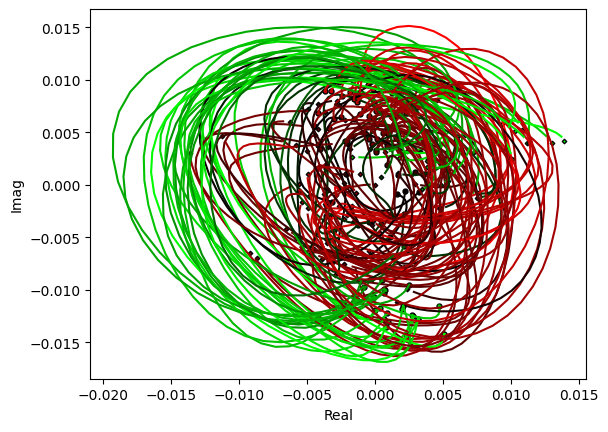

In [366]:
P_FR_3D = np.reshape(P_FR,(2,Z_3D.shape[1],Z_3D.shape[2] ))
print(P_FR_3D.shape)

plot_nuero(P_FR_3D)


(-6.223015277861142e-61+0.06678644268932371j)
[-0.12145167-0.29247514j -0.02264629-0.3053483j   0.15669307+0.03455732j
  0.34291133-0.24029819j -0.04616188+0.2118037j   0.02736843+0.11961033j
  0.27293921-0.13402159j  0.42630604+0.j         -0.02803295+0.05602574j
  0.16332396+0.09551227j -0.22482641-0.15605216j -0.07399774-0.38540926j]
(2, 108, 46)


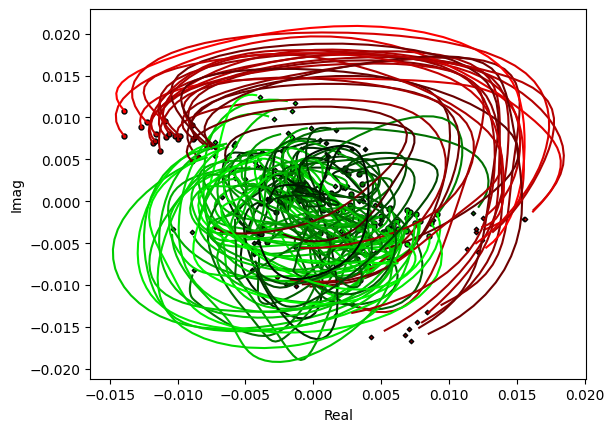

In [367]:
scd_max_eigenvalue = eigenvalues[max_imag_index+2]
scd_max_eigenvector = eigenvectors[:,max_imag_index+2]
print(scd_max_eigenvalue)
print(scd_max_eigenvector)
P_scd = np.array([scd_max_eigenvector.real.T/np.linalg.norm(scd_max_eigenvector.real.T),scd_max_eigenvector.imag.T/np.linalg.norm(scd_max_eigenvector.imag.T)])
P_FR_scd = np.dot(P_scd,Z)
P_FR_3D_scd = np.reshape(P_FR_scd,(2,Z_3D.shape[1],Z_3D.shape[2] ))
print(P_FR_3D_scd.shape)
plot_nuero(P_FR_3D_scd)

(-2.3852447794681098e-18+0.04491465518854705j)
[ 0.10968374+0.02071796j -0.00397057-0.19998238j -0.20972695-0.36761076j
 -0.30532091-0.14270371j -0.04564409-0.17820308j -0.04494115+0.15999154j
 -0.18787569+0.36449068j  0.51016334+0.j          0.09156797-0.29056211j
 -0.13800248+0.0746437j  -0.08202091+0.14319507j  0.13009096-0.05801605j]
(2, 108, 46)


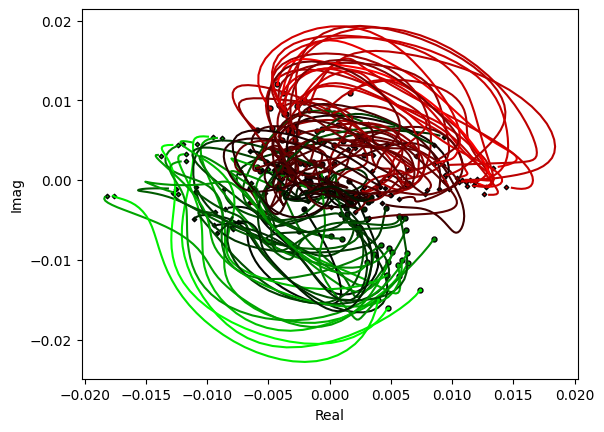

In [368]:
thd_max_eigenvalue = eigenvalues[max_imag_index+4]
thd_max_eigenvector = eigenvectors[:,max_imag_index+4]
print(thd_max_eigenvalue)
print(thd_max_eigenvector)
P_thd = np.array([thd_max_eigenvector.real.T/np.linalg.norm(thd_max_eigenvector.real.T),thd_max_eigenvector.imag.T/np.linalg.norm(thd_max_eigenvector.imag.T)])
P_FR_thd = np.dot(P_thd,Z)
P_FR_3D_thd = np.reshape(P_FR_thd,(2,Z_3D.shape[1],Z_3D.shape[2] ))
print(P_FR_3D_thd.shape)
plot_nuero(P_FR_3D_thd)


__6__

In [369]:
start = np.searchsorted(times, -800)
end = np.searchsorted(times, -150)

X_Cut = X[:,:,start:end+1] #end by itself to not include but chose end+1 to have 46 as handout says
T=X_Cut.shape[2]
X_Cut.shape


(182, 108, 66)

In [370]:
X_new = X_Cut.reshape(N,C*T)
X_new.shape

(182, 7128)

In [371]:
V_M.T.shape

(12, 182)

In [372]:
P.shape

(2, 12)

In [373]:
(P@V_M.T).shape

(2, 182)

In [374]:
P_FR_New = P@V_M.T@X_new
P_FR_New.shape

(2, 7128)

(2, 108, 46)


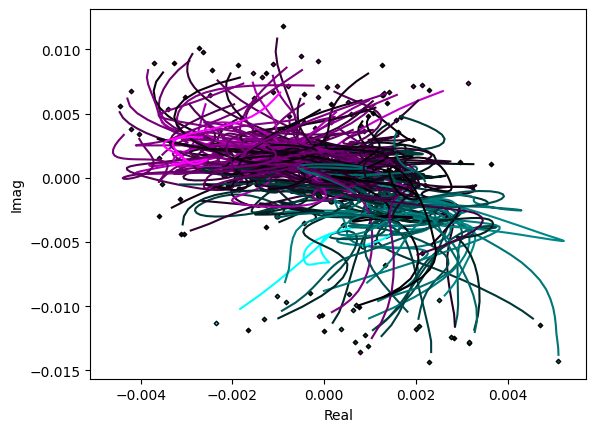

In [375]:

P_FR_New = np.reshape(P_FR_New, (2,C,T))
P_FR_3D = np.reshape(P_FR,(2,Z_3D.shape[1],Z_3D.shape[2] ))
print(P_FR_3D.shape)


plot_nuero(P_FR_New,alt = True)



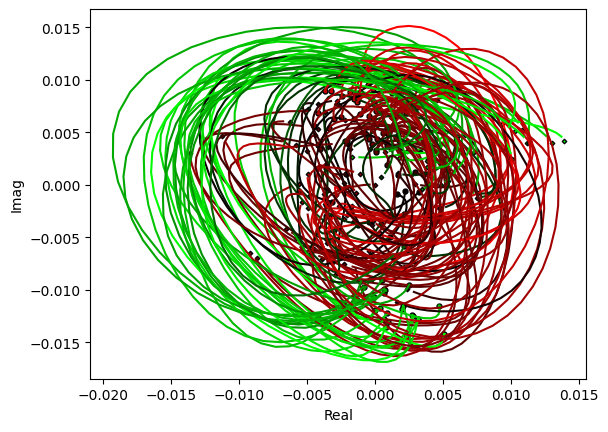

In [376]:
plot_nuero(P_FR_3D)

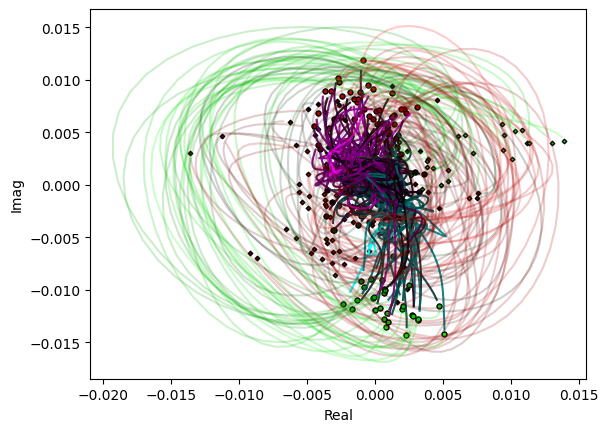

In [381]:
plot_nuero(P_FR_New,alt=True, alph = 0.9)
plot_nuero(P_FR_3D, alph = 0.2)
plt.show()

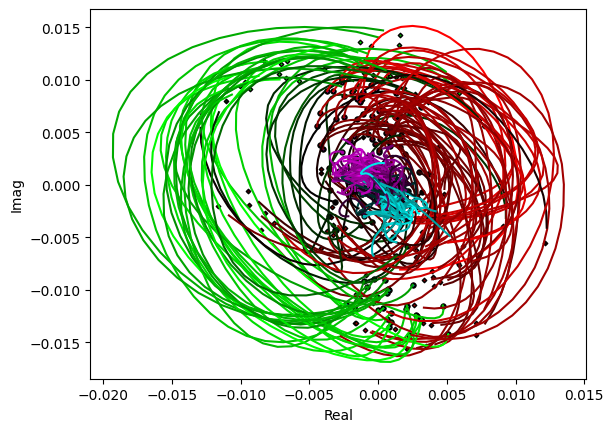

In [ ]:

cols = cond_color.get_colors(P_FR_3D[0,:,0],P_FR_3D[1,:,0])
cols_2 = cond_color.get_colors(P_FR_New[0,:,-1],P_FR_New[1,:,-1], alt_colors=True)
for c in range(Z_3D.shape[1]):
    plt.plot(P_FR_3D[0,c,:30],P_FR_3D[1,c,:30], color = cols[c])
    
    cond_color.plot_start(P_FR_3D[0,c,0], P_FR_3D[1,c,0], colors=cols[c], markersize = 50)
    cond_color.plot_end(P_FR_3D[0,c,30], P_FR_3D[1,c,30], colors=cols[c], markersize = 5)

for c in range(C):
    plt.plot(P_FR_New[0,c,:30],P_FR_New[1,c,:30], color = cols_2[c])
    
    cond_color.plot_start(P_FR_New[0,c,0], P_FR_New[1,c,0], colors=cols_2[c], markersize = 50)
    cond_color.plot_end(P_FR_New[0,c,-1], P_FR_New[1,c,-1], colors=cols_2[c], markersize = 5)

plt.xlabel("Real")
plt.ylabel("Imag")
plt.show()
